In [1]:
import xarray as xr
from xgrads import open_CtlDataset
from cartopy import crs as ccrs
import cartopy.mpl.ticker as cticker
import matplotlib.pyplot as plt
import matplotlib.colors

In [ ]:
ds1=xr.open_dataset('mri3.nc')

In [4]:
ds=open_CtlDataset('mri3.ctl')

In [5]:
ds

<xarray.Dataset>
Dimensions:  (time: 17, lat: 301, lon: 301)
Coordinates:
  * time     (time) datetime64[ns] 2024-03-13T12:00:00 ... 2024-03-15T12:00:00
  * lat      (lat) float32 0.0 0.01 0.02 0.03 0.04 ... 2.96 2.97 2.98 2.99 3.0
  * lon      (lon) float32 103.0 103.0 103.0 103.0 ... 106.0 106.0 106.0 106.0
Data variables: (12/17)
    hw       (time, lat, lon) float32 dask.array<chunksize=(1, 301, 301), meta=np.ndarray>
    pww      (time, lat, lon) float32 dask.array<chunksize=(1, 301, 301), meta=np.ndarray>
    dw       (time, lat, lon) float32 dask.array<chunksize=(1, 301, 301), meta=np.ndarray>
    u        (time, lat, lon) float32 dask.array<chunksize=(1, 301, 301), meta=np.ndarray>
    v        (time, lat, lon) float32 dask.array<chunksize=(1, 301, 301), meta=np.ndarray>
    hws      (time, lat, lon) float32 dask.array<chunksize=(1, 301, 301), meta=np.ndarray>
    ...       ...
    hw_s1    (time, lat, lon) float32 dask.array<chunksize=(1, 301, 301), meta=np.ndarray>
    Tp_s1    (time, lat, lon) float32 dask.array<chunksize=(1, 301, 301), meta=np.ndarray>
    Dw_s1    (time, lat, lon) float32 dask.array<chunksize=(1, 301, 301), meta=np.ndarray>
    hw_s2    (time, lat, lon) float32 dask.array<chunksize=(1, 301, 301), meta=np.ndarray>
    Tp_s2    (time, lat, lon) float32 dask.array<chunksize=(1, 301, 301), meta=np.ndarray>
    Dw_s2    (time, lat, lon) float32 dask.array<chunksize=(1, 301, 301), meta=np.ndarray>
Attributes:
    comment:  significant wave height
    storage:  99
    title:    Wave
    undef:    -999.0
    pdef:     None

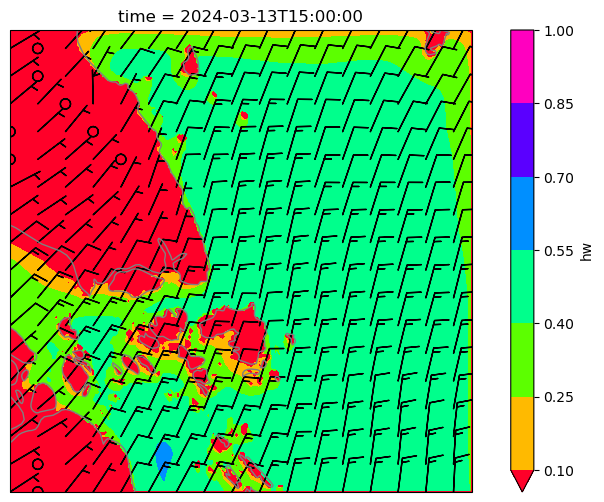

In [6]:
import cartopy.mpl.ticker as cticker
import matplotlib.pyplot as plt
import matplotlib.colors

map_projection=ccrs.PlateCarree()
#color=matplotlib.colors.LinearSegmentedColormap.from_list("",'white','blue')
vmins=0.1
vmaxs=1.0

fig,ax=plt.subplots(figsize=(10,6),
                   subplot_kw={'projection': map_projection})

lon=ds.lon
lat=ds.lat

sigwave=ds.hw.isel(time=1).plot.contourf(ax=ax,vmin=vmins,cmap='gist_rainbow',
                                         vmax=vmaxs,transform=map_projection,x='lon',y='lat')

lonu=ds.lon[::18]
latu=ds.lat[::18]
uwind=ds.u.isel(time=1)*1.82
vwind=ds.v.isel(time=1)*1.82
#wind=ax.quiver(lonu,latu,uwind[::8,::8],vwind[::8,::8],transform=ccrs.PlateCarree())
wind=ax.barbs(lonu,latu,uwind[::18,::18],vwind[::18,::18],transform=ccrs.PlateCarree())
#wind=ax.quiver(lon,lat,uwind,vwind,transform=ccrs.PlateCarree())
ax.coastlines(color='grey')

In [ ]:
import cartopy.mpl.ticker as cticker
import matplotlib.pyplot as plt
import matplotlib.colors

map_projection=ccrs.PlateCarree()
#color=matplotlib.colors.LinearSegmentedColormap.from_list("",'white','blue')
#vmins=0.1
#vmaxs=1.0

fig,ax=plt.subplots(figsize=(10,6),
                   subplot_kw={'projection': map_projection})

lon=ds1.lon
lat=ds1.lat

sigwave=ds1.hw.isel(time=1).plot.contourf(ax=ax,vmin=vmins,cmap='gist_rainbow',
                                         vmax=vmaxs,transform=map_projection,x='lon',y='lat')

lonu=ds1.lon[::8]
latu=ds1.lat[::8]
uwind=ds1.u.isel(time=1)*1.82
vwind=ds1.v.isel(time=1)*1.82
wind=ax.quiver(lonu,latu,uwind[::8,::8],vwind[::8,::8],transform=ccrs.PlateCarree())
#wind=ax.barbs(lonu,latu,uwind[::18,::18],vwind[::18,::18],transform=ccrs.PlateCarree())
#wind=ax.quiver(lon,lat,uwind,vwind,transform=ccrs.PlateCarree())
ax.coastlines(color='grey')